# Machine Learning Portfolio 2

|Name|Github|Kaggle|
|----|------|------|
|Henry Lau|HenryLau08|Henry Lau|
|Mohamed Belaachir|mobelaachir|Mo Belaachir|
|Jayden Debi-Tewari|Jaydendt1|jaydendt123|
|Quincy Soerohardjo|quincysoerohardjo2002|Quincy Soerohardjo|
|Mattias Aareleid|mattyonaize|Mattias Aareleid|

## Table of Contents
- [Data Overview](#data-overview)
- [Exploratory Data Analysis](#exploratory-data-analysis)
- [Modeling](#modeling)

- [Results](#results)
- [Conclusion & Advice](#conclusion--advice)
- [Sources](#sources)

In [176]:
# Libraries

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.fft import fft, ifft
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score


## Data Overview

Wij hebben de kolom date_hour omgezet naar een datetime-formaat om tijdsreeksanalyses mogelijk te maken. Wanneer date_hour als een datetime-object is opgeslagen, kunnen we eenvoudig tijdsgebonden analyses uitvoeren.

In [177]:
train = pd.read_csv('train.csv', parse_dates=['date_hour'])
test = pd.read_csv('test.csv', parse_dates=['date_hour'])
sample_submission = pd.read_csv('sample_submission.csv')

In [178]:
# Train and Test data
display(train.head(10), test.head(10))

,date_hour,holiday,weathersit,temp,atemp,hum,windspeed,cnt
0,2011-01-01 00:00:00,0,1,0.24,0.2879,0.81,0.0000,16
1,2011-01-01 01:00:00,0,1,0.22,0.2727,0.80,0.0000,40
2,2011-01-01 02:00:00,0,1,0.22,0.2727,0.80,0.0000,32
3,2011-01-01 03:00:00,0,1,0.24,0.2879,0.75,0.0000,13
4,2011-01-01 04:00:00,0,1,0.24,0.2879,0.75,0.0000,1
5,2011-01-01 05:00:00,0,2,0.24,0.2576,0.75,0.0896,1
6,2011-01-01 06:00:00,0,1,0.22,0.2727,0.80,0.0000,2
7,2011-01-01 07:00:00,0,1,0.20,0.2576,0.86,0.0000,3
8,2011-01-01 08:00:00,0,1,0.24,0.2879,0.75,0.0000,8
9,2011-01-01 09:00:00,0,1,0.32,0.3485,0.76,0.0000,14


,date_hour,holiday,weathersit,temp,atemp,hum,windspeed
0,2012-12-01 00:00:00,0,1,0.26,0.3030,0.81,0.0000
1,2012-12-01 01:00:00,0,1,0.26,0.3030,0.81,0.0000
2,2012-12-01 02:00:00,0,2,0.26,0.3030,0.81,0.0000
3,2012-12-01 03:00:00,0,2,0.26,0.2727,0.81,0.1343
4,2012-12-01 04:00:00,0,1,0.26,0.2879,0.81,0.0896
5,2012-12-01 05:00:00,0,1,0.24,0.2576,0.87,0.0896
6,2012-12-01 06:00:00,0,1,0.24,0.2424,0.87,0.1343
7,2012-12-01 07:00:00,0,2,0.24,0.2424,0.87,0.1343
8,2012-12-01 08:00:00,0,2,0.24,0.2424,0.87,0.1343
9,2012-12-01 09:00:00,0,2,0.26,0.2424,0.93,0.2537


In [179]:
# Sample submission for kaggle
display(sample_submission.head(10))

,date_hour,cnt
0,2012-12-01 00:00:00,784
1,2012-12-01 01:00:00,80
2,2012-12-01 02:00:00,605
3,2012-12-01 03:00:00,604
4,2012-12-01 04:00:00,544
5,2012-12-01 05:00:00,100
6,2012-12-01 06:00:00,344
7,2012-12-01 07:00:00,18
8,2012-12-01 08:00:00,57
9,2012-12-01 09:00:00,603


## Exploratory Data Analysis

### Train Data

In [180]:
display(train.head())

,date_hour,holiday,weathersit,temp,atemp,hum,windspeed,cnt
0,2011-01-01 00:00:00,0,1,0.24,0.2879,0.81,0.0,16
1,2011-01-01 01:00:00,0,1,0.22,0.2727,0.80,0.0,40
2,2011-01-01 02:00:00,0,1,0.22,0.2727,0.80,0.0,32
3,2011-01-01 03:00:00,0,1,0.24,0.2879,0.75,0.0,13
4,2011-01-01 04:00:00,0,1,0.24,0.2879,0.75,0.0,1


### Test Data

In [181]:
display(test.head())

,date_hour,holiday,weathersit,temp,atemp,hum,windspeed
0,2012-12-01 00:00:00,0,1,0.26,0.3030,0.81,0.0000
1,2012-12-01 01:00:00,0,1,0.26,0.3030,0.81,0.0000
2,2012-12-01 02:00:00,0,2,0.26,0.3030,0.81,0.0000
3,2012-12-01 03:00:00,0,2,0.26,0.2727,0.81,0.1343
4,2012-12-01 04:00:00,0,1,0.26,0.2879,0.81,0.0896


In [182]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16637 entries, 0 to 16636
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date_hour   16637 non-null  datetime64[ns]
 1   holiday     16637 non-null  int64         
 2   weathersit  16637 non-null  int64         
 3   temp        16637 non-null  float64       
 4   atemp       16637 non-null  float64       
 5   hum         16637 non-null  float64       
 6   windspeed   16637 non-null  float64       
 7   cnt         16637 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 1.0 MB


### Data Types
Er zijn verschillende data types aanwezig:
- **datetime**: date_hour
- **Integer**: holiday, weathersit en cnt
- **Float**: temp, atemp, hum en windspeed

In [183]:
display(train.describe())

,date_hour,holiday,weathersit,temp,atemp,hum,windspeed,cnt
count,16637,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000
mean,2011-12-18 02:20:08.294764544,0.028671,1.415580,0.504745,0.482608,0.624756,0.190310,190.477009
min,2011-01-01 00:00:00,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2011-06-27 05:00:00,0.000000,1.000000,0.340000,0.333300,0.470000,0.104500,41.000000
50%,2011-12-18 06:00:00,0.000000,1.000000,0.520000,0.500000,0.620000,0.194000,143.000000
75%,2012-06-09 02:00:00,0.000000,2.000000,0.660000,0.621200,0.780000,0.253700,282.000000
max,2012-11-30 23:00:00,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000
std,NaN,0.166885,0.637298,0.192369,0.171557,0.193227,0.121915,182.026755


### Controle op Ontbrekende Waarden

In [184]:
print(train.isnull().sum())

date_hour     0
holiday       0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


Alle kolommen in deze dataset hebben geen ontbrekende waarden. Dit betekent dat er geen ontbrekende data hoeft te worden aangevuld of verwijderd, wat de analyse eenvoudiger maakt.

### Vorm van de gegevens:

In [185]:
print(train.shape)

(16637, 8)


De dataset bevat 8 kolommen (variabelen) en 16.637 rijen.

### Kolommen beschrijven:  
- **date_hour**: Datum en tijdstip.
- **holiday**: Geeft aan of de datum een feestdag is (0 = geen feestdag, 1 = feestdag).
- **weathersit**: De beschrijving van de weersomstandigheden op een schaal van 1 tot 4, waarbij 1 goed weer is en 4 heel slecht weer.
- **temp**: Genormaliseerd temperatuur
- **atemp**: Genormaliseerd gevoelstemperatuur
- **hum**: Genormaliseerd luchtvochtigheid
- **windspeed**: Genormaliseerd windsnelheid
- **cnt**: Aantal verhuurd

### Het meetniveau voor elke kolom:  
- **date_hour**: Interval
- **holiday**: Nominaal (binaire categorische variabele: 0 = geen feestdag, 1 = feestdag).
- **weathersit**: Ordinaal (categorieën hebben een volgorde).
- **temp**: Interval (continue variabele).
- **atemp**: Interval (continue variabele).
- **hum**: Interval (continue variabele).
- **windspeed**: Interval (continue variabele).
- **cnt**: Ratio

In [186]:
sns.set_style('darkgrid')

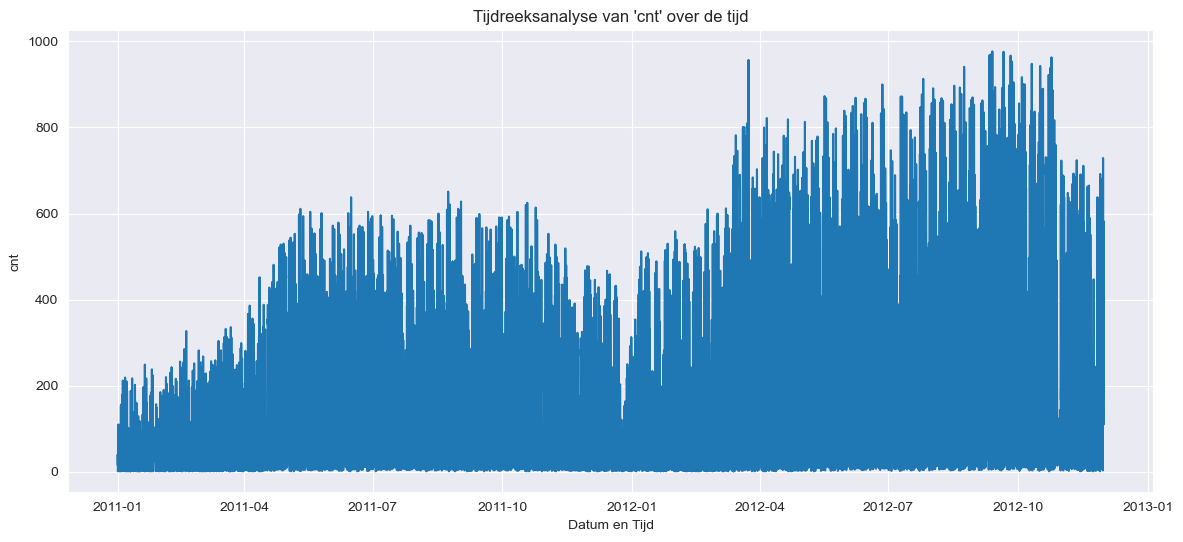

In [187]:
# Tijdreeksanalyse van 'cnt' over de tijd
plt.figure(figsize=(14, 6))
plt.plot(train['date_hour'], train["cnt"])
plt.title("Tijdreeksanalyse van 'cnt' over de tijd")
plt.xlabel("Datum en Tijd")
plt.ylabel("cnt")
plt.show()

### Verdeling van de kolommen

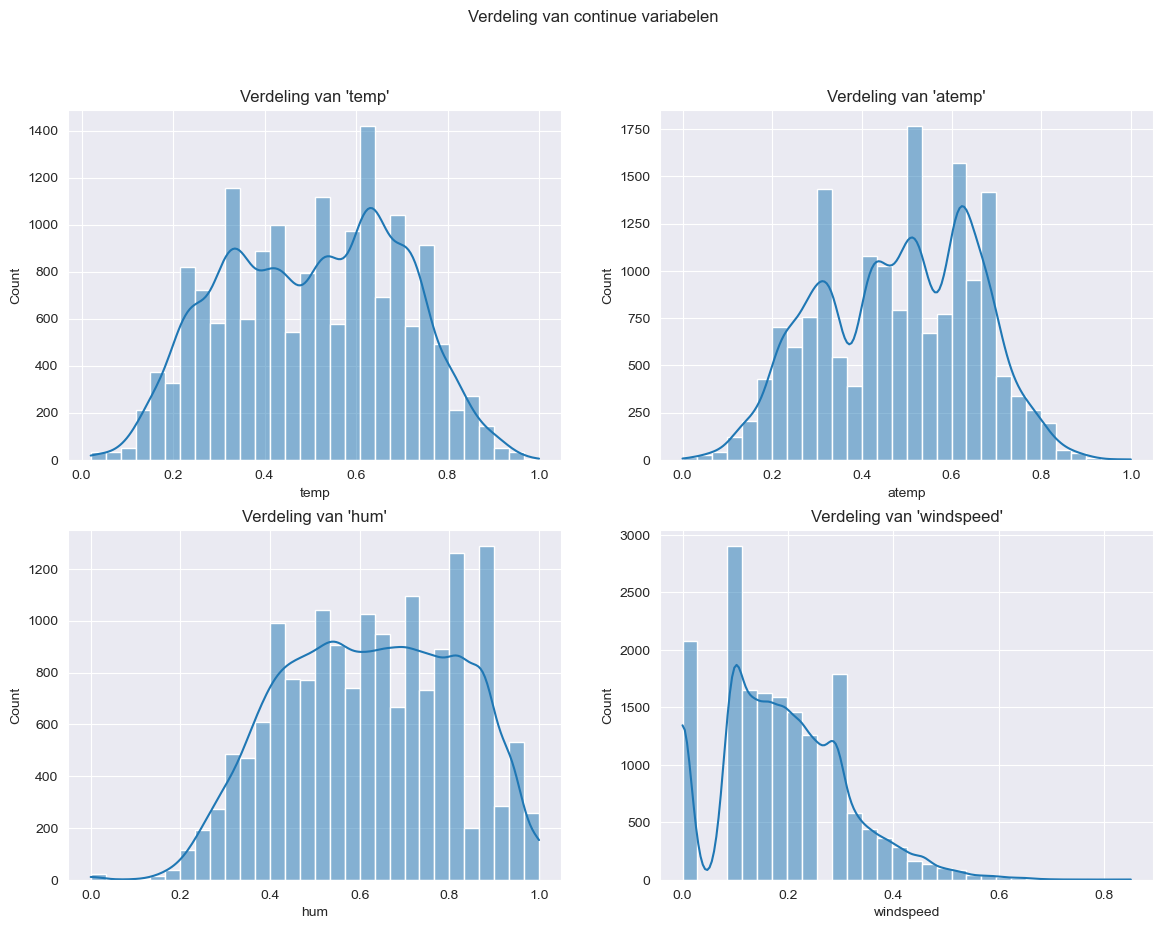

In [188]:
# Verdelingsplots van de continue variabelen
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Verdeling van continue variabelen")

sns.histplot(train["temp"], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Verdeling van 'temp'")

sns.histplot(train["atemp"], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Verdeling van 'atemp'")

sns.histplot(train["hum"], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Verdeling van 'hum'")

sns.histplot(train["windspeed"], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Verdeling van 'windspeed'")

plt.show()

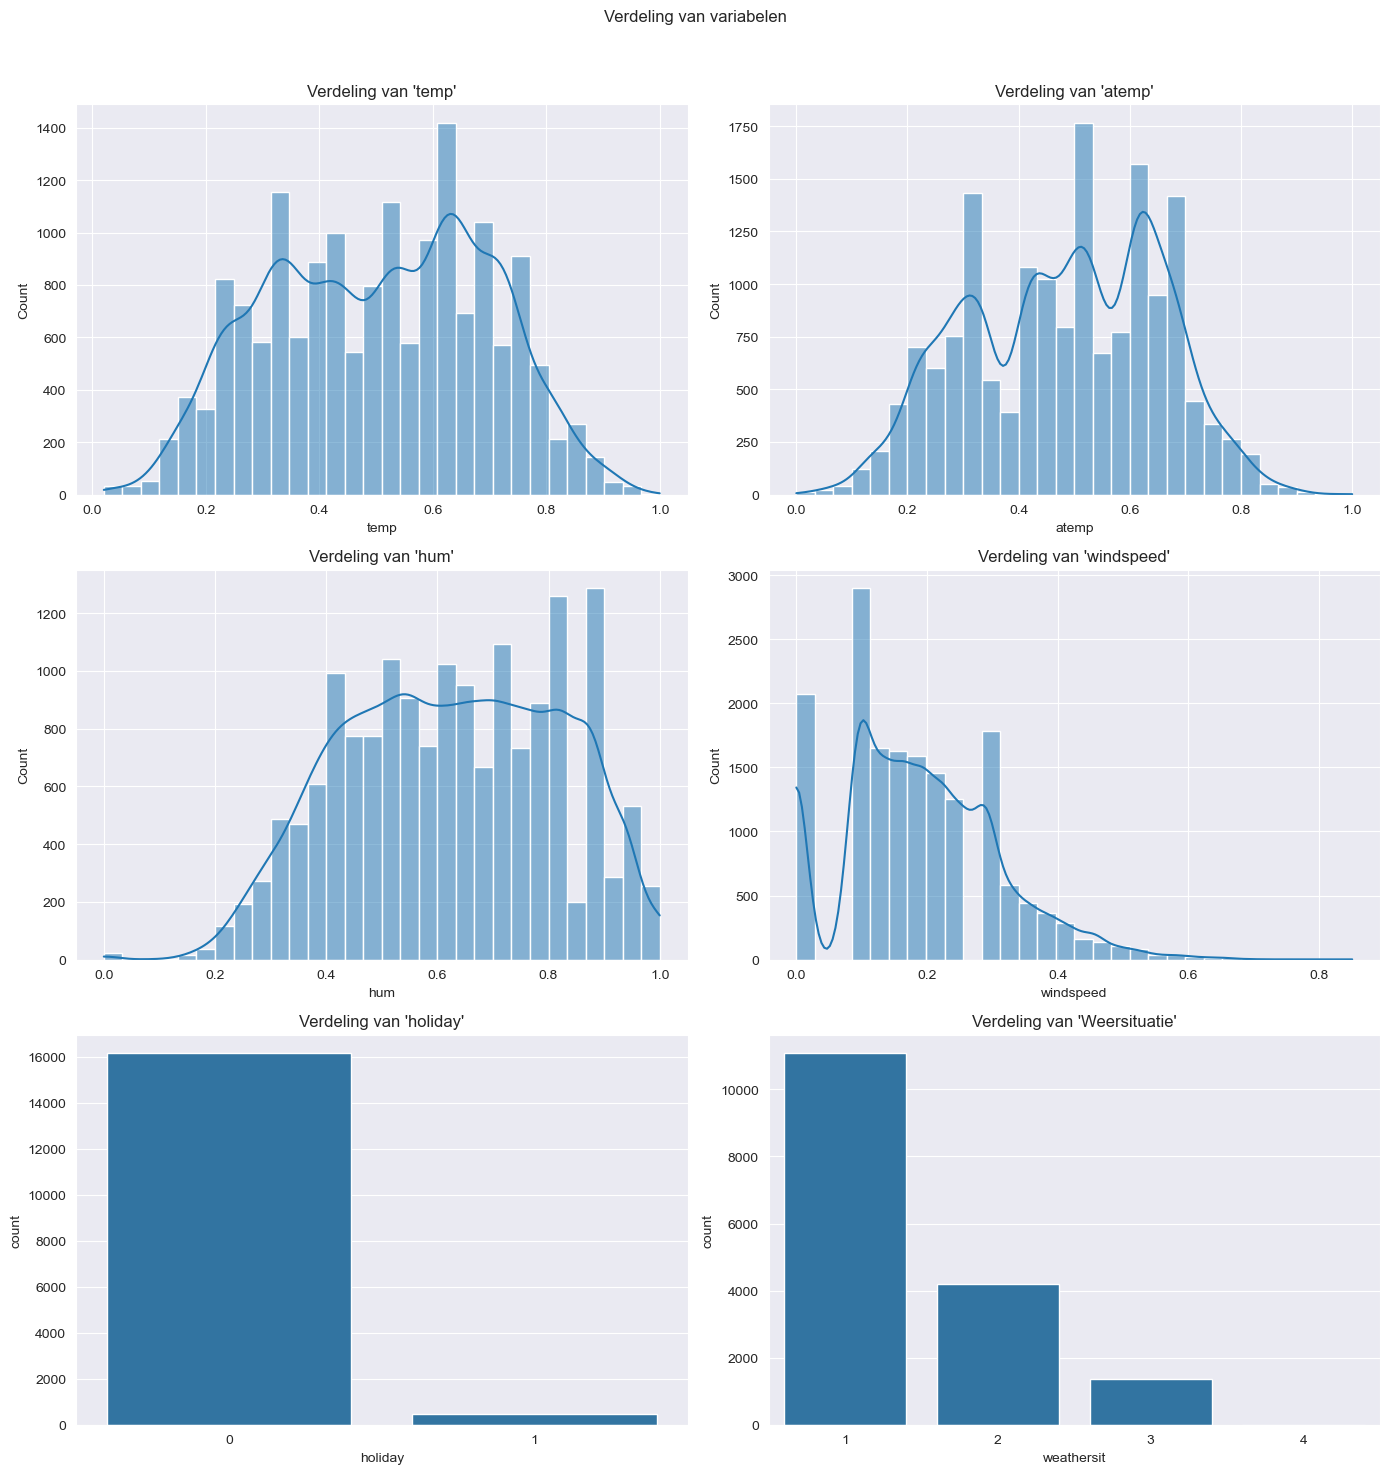

In [189]:
# Verdelingsplots van de continue variabelen
fig, axes = plt.subplots(3, 2, figsize=(14, 15))
fig.suptitle("Verdeling van variabelen")

# Continue variabelen
sns.histplot(train["temp"], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Verdeling van 'temp'")

sns.histplot(train["atemp"], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Verdeling van 'atemp'")

sns.histplot(train["hum"], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Verdeling van 'hum'")

sns.histplot(train["windspeed"], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Verdeling van 'windspeed'")

# Categorische variabelen
sns.countplot(x=train["holiday"], ax=axes[2, 0])
axes[2, 0].set_title("Verdeling van 'holiday'")

sns.countplot(x=train["weathersit"], ax=axes[2, 1])
axes[2, 1].set_title("Verdeling van 'Weersituatie'")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Relaties

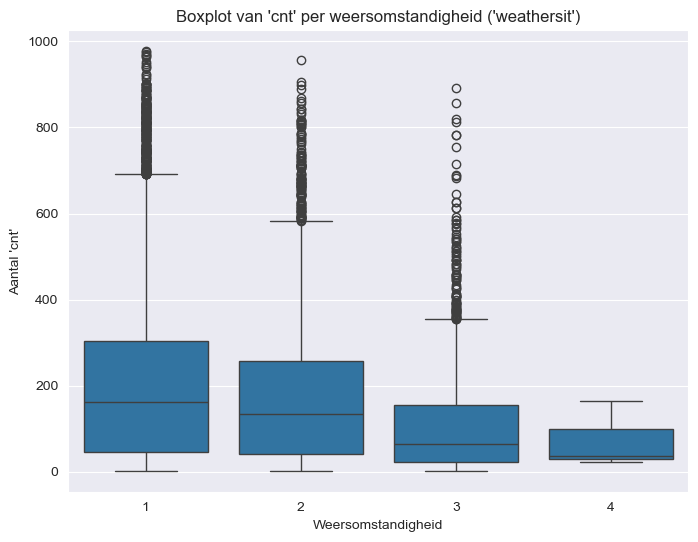

In [190]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="weathersit", y="cnt", data=train)
plt.title("Boxplot van 'cnt' per weersomstandigheid ('weathersit')")
plt.xlabel("Weersomstandigheid")
plt.ylabel("Aantal 'cnt'")
plt.show()

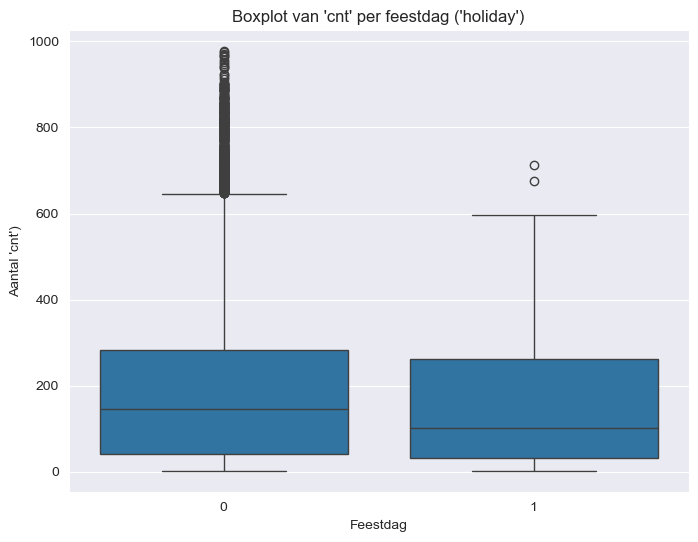

In [191]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="holiday", y="cnt", data=train)
plt.title("Boxplot van 'cnt' per feestdag ('holiday')")
plt.xlabel("Feestdag")
plt.ylabel("Aantal 'cnt')")
plt.show()

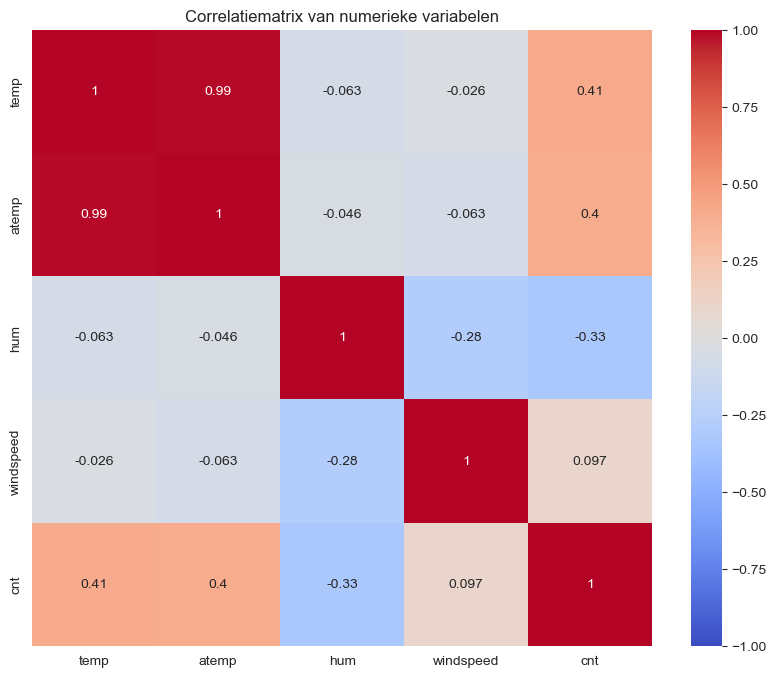

In [192]:
# Correlatiematrix van numerieke variabelen
plt.figure(figsize=(10, 8))
correlation_matrix = train[["temp", "atemp", "hum", "windspeed", "cnt"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlatiematrix van numerieke variabelen")
plt.show()

**Tijdreeksanalyse van cnt:**

- Het aantal cnt neemt in de loop van de tijd toe, met duidelijke schommelingen die mogelijk verband houden met seizoenen of andere tijdsgebonden factoren.

**Verdelingsplots van continue variabelen:**

- temp en atemp hebben een bijna normale verdeling, met een piek rond 0,6.
- hum heeft een vrij gelijkmatige verdeling, maar met een lichte piek bij hogere luchtvochtigheidswaarden.
- windspeed heeft een piek bij lagere waardes, wat suggereert dat de meeste cnt lage windsnelheden hebben.
- Er blijkt heel weinig holidays te zijn
- De verdeling bij weeromstaandigheid is er te zien dat de aantallen per waarde daalt, waarbij 1 de hoogste is. 

**Boxplots van cnt per weersomstandigheid:**

- Het aantal cnt is het hoogst bij heldere weersomstandigheden en neemt af bij zwaardere weersomstandigheden. Dit suggereert dat slecht weer invloed kan hebben op de activiteit.

**Boxplots van cnt per feestdag (holiday):**

- Er zijn geen significante verschillen in cnt tussen feestdagen en gewone dagen, hoewel de variatie iets groter is op gewone dagen.

**Correlatiematrix:**

- temp en atemp zijn sterk gecorreleerd (0,99), wat logisch is omdat beide temperatuurgerelateerd zijn.
- temp en atemp vertonen een matige positieve correlatie met cnt, wat aangeeft dat hogere temperaturen mogelijk gepaard gaan met meer cnt.
- hum heeft een zwakke negatieve correlatie met cnt, wat kan betekenen dat hogere luchtvochtigheid  een negatieve invloed kan hebben op de cnt.
- temp en atemp vertonen vaak een matige positieve correlatie met cnt. Dit wijst erop dat hogere temperaturen kunnen leiden tot een toename in het aantal cnt.


#### Controle op Uitschieters

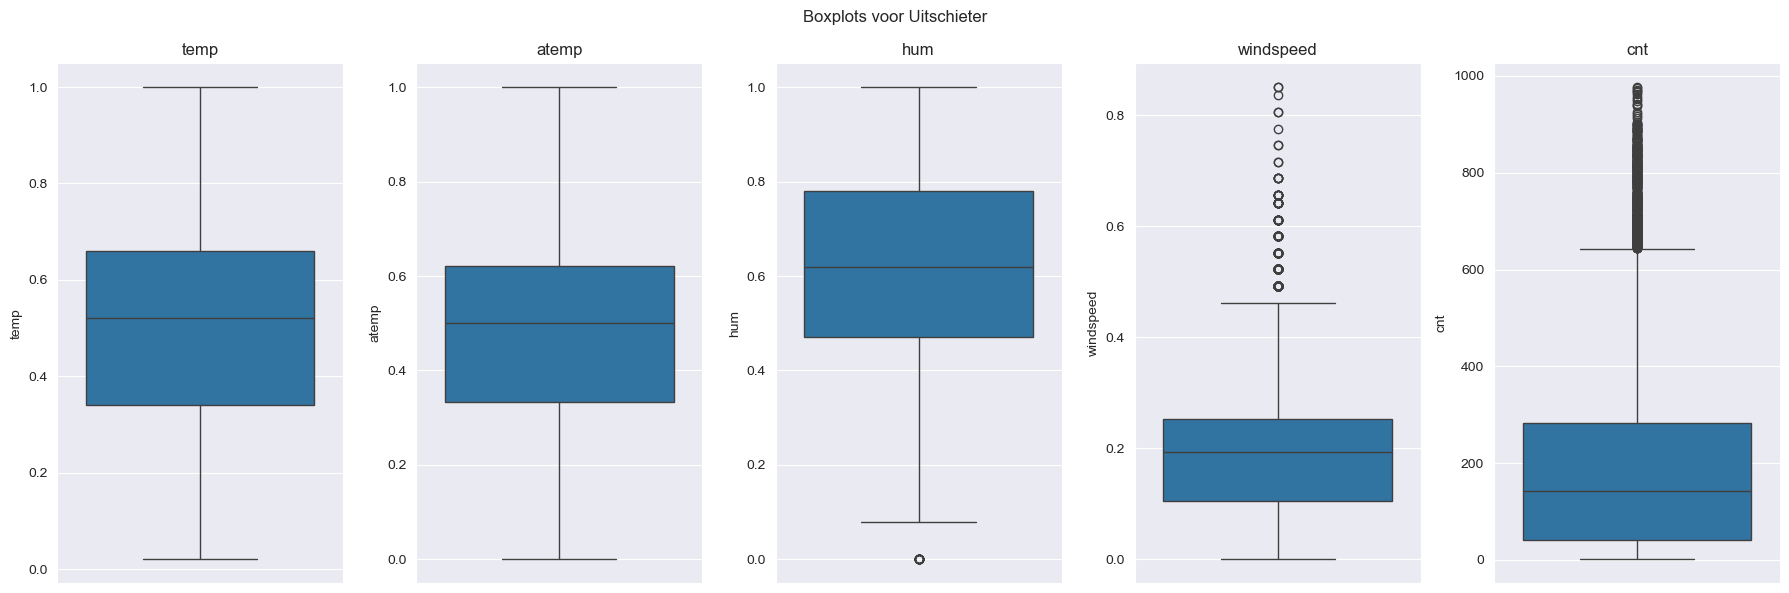

In [193]:
fig, axes = plt.subplots(1, 5, figsize=(18, 6))
fig.suptitle("Boxplots voor Uitschieter")

cols_names = ["temp", "atemp", "hum", "windspeed", "cnt"]
for i, col in enumerate(cols_names):
    sns.boxplot(y=train[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

- hum: Er zijn enkele waarden dicht bij de minimumdie als outliers kunnen worden beschouwd.
- windspeed : Er zijn een paar lage waarden die als uitschieters worden beschouwd.
- cnt: Er zijn een paar hoge waarden die buiten het interkwartielbereik liggen en als uitschieters kunnen worden gezien.

In [194]:
# Nieuwe kolommen toevoegen voor de tijdreeksanalyse van 'cnt'
train["year"] = train["date_hour"].dt.year
train["month"] = train["date_hour"].dt.month
train["day_of_month"] = train["date_hour"].dt.day
train["day_of_year"] = train['date_hour'].dt.day_of_year
train["hour"] = train["date_hour"].dt.hour
train["weekday"] = train["date_hour"].dt.weekday
display(train.head())

,date_hour,holiday,weathersit,temp,atemp,hum,windspeed,cnt,year,month,day_of_month,day_of_year,hour,weekday
0,2011-01-01 00:00:00,0,1,0.24,0.2879,0.81,0.0,16,2011,1,1,1,0,5
1,2011-01-01 01:00:00,0,1,0.22,0.2727,0.80,0.0,40,2011,1,1,1,1,5
2,2011-01-01 02:00:00,0,1,0.22,0.2727,0.80,0.0,32,2011,1,1,1,2,5
3,2011-01-01 03:00:00,0,1,0.24,0.2879,0.75,0.0,13,2011,1,1,1,3,5
4,2011-01-01 04:00:00,0,1,0.24,0.2879,0.75,0.0,1,2011,1,1,1,4,5


In [195]:
test["year"] = test["date_hour"].dt.year
test["month"] = test["date_hour"].dt.month
test["day_of_month"] = test["date_hour"].dt.day
test["day_of_year"] = test['date_hour'].dt.day_of_year
test["hour"] = test["date_hour"].dt.hour
test["weekday"] = test["date_hour"].dt.weekday

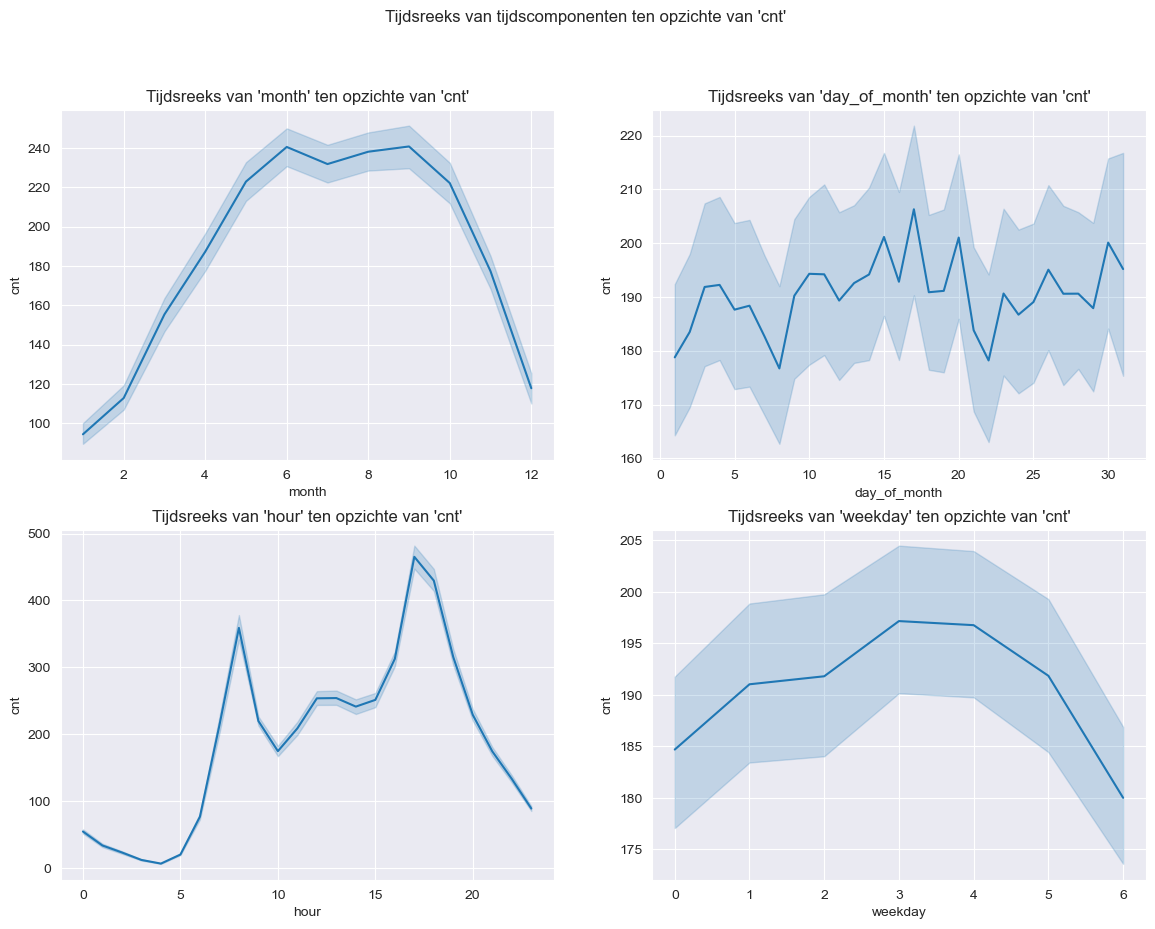

In [196]:
# Tijdsreeksplots van de nieuwe kolommen ten opzichte van 'cnt'
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Tijdsreeks van tijdscomponenten ten opzichte van 'cnt'")

# Tijdscomponenten ten opzichte van 'cnt'
sns.lineplot(x='month', y='cnt', data=train, ax=axes[0, 0])
axes[0, 0].set_title("Tijdsreeks van 'month' ten opzichte van 'cnt'")

sns.lineplot(x='day_of_month', y='cnt', data=train, ax=axes[0, 1])
axes[0, 1].set_title("Tijdsreeks van 'day_of_month' ten opzichte van 'cnt'")

sns.lineplot(x='hour', y='cnt', data=train, ax=axes[1, 0])
axes[1, 0].set_title("Tijdsreeks van 'hour' ten opzichte van 'cnt'")

sns.lineplot(x='weekday', y='cnt', data=train, ax=axes[1, 1])
axes[1, 1].set_title("Tijdsreeks van 'weekday' ten opzichte van 'cnt'")

# plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Feature Engineering

In [197]:
train.set_index('date_hour', inplace=True)
test.set_index('date_hour', inplace=True)

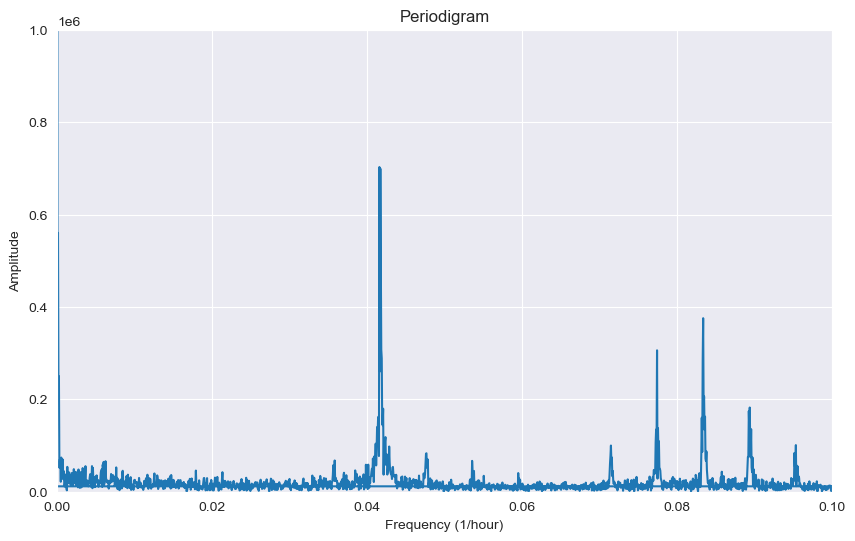

In [198]:
tijdreeks = train['cnt']
n = len(tijdreeks)
freq = np.fft.fftfreq(n,1)
fft_result = fft(tijdreeks)

plt.figure(figsize=(10, 6))
plt.plot(freq, np.abs(fft_result))
plt.xlabel('Frequency (1/hour)')
plt.ylabel('Amplitude')
plt.xlim([0,0.1])
plt.ylim([0,1e6])
plt.title('Periodigram')
plt.grid(True)
plt.show()

In [199]:
df_fft = pd.DataFrame(np.abs(fft_result))
df_fft['freq'] = freq
hours = []
days= []
for f in freq:
    if f != 0:
        hours.append(1/f)
        days.append(1/f/24)
    else:
        hours.append(np.inf)
        days.append(np.inf)
df_fft['duur in uren'] = hours
df_fft['duur in dagen'] = days
df_fft.rename(columns={0:'amplitude'}, inplace=True)
df_fft = df_fft[(df_fft['amplitude'] > 0.4e+06)&(df_fft['freq'] > 0)]
df_fft

# daily and yearly pattern

,amplitude,freq,duur in uren,duur in dagen
1,489864.299841,0.000060,16637.000000,693.208333
2,560236.241034,0.000120,8318.500000,346.604167
692,702799.953019,0.041594,24.041908,1.001746
694,699280.808600,0.041714,23.972622,0.998859
695,479527.144257,0.041774,23.938129,0.997422


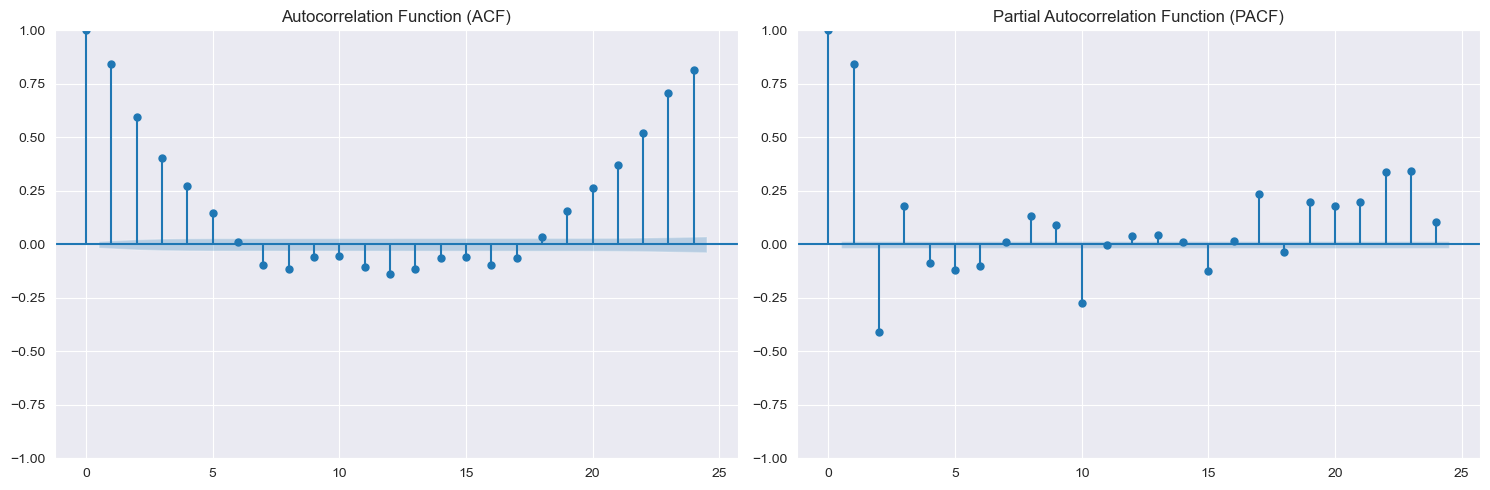

In [200]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# ACF plot
plot_acf(train['cnt'], ax=axes[0], lags=24)
axes[0].set_title("Autocorrelation Function (ACF)")

# PACF plot
plot_pacf(train['cnt'], ax=axes[1], lags=24)
axes[1].set_title("Partial Autocorrelation Function (PACF)")

plt.tight_layout()
plt.show()

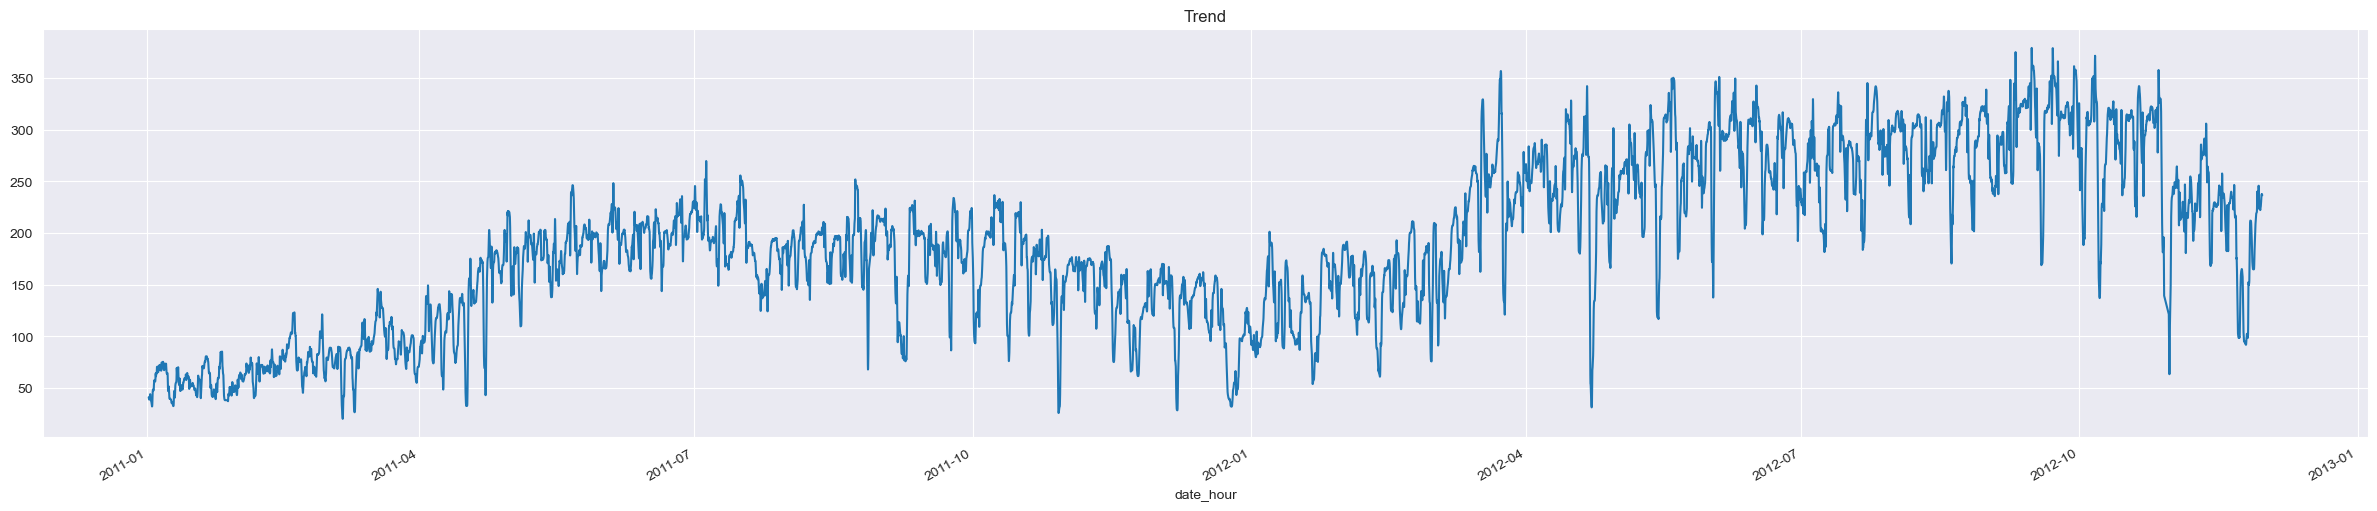

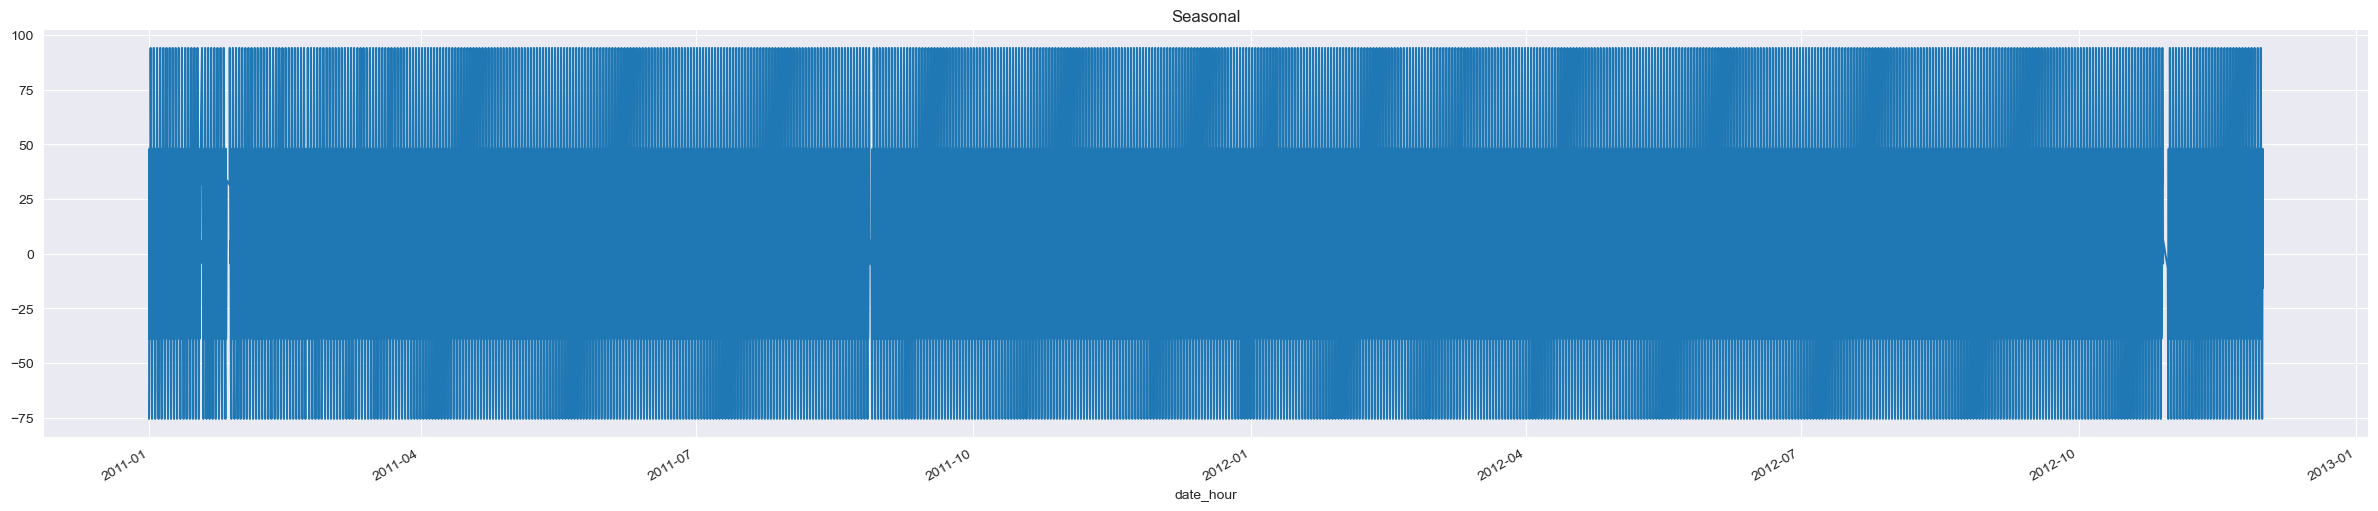

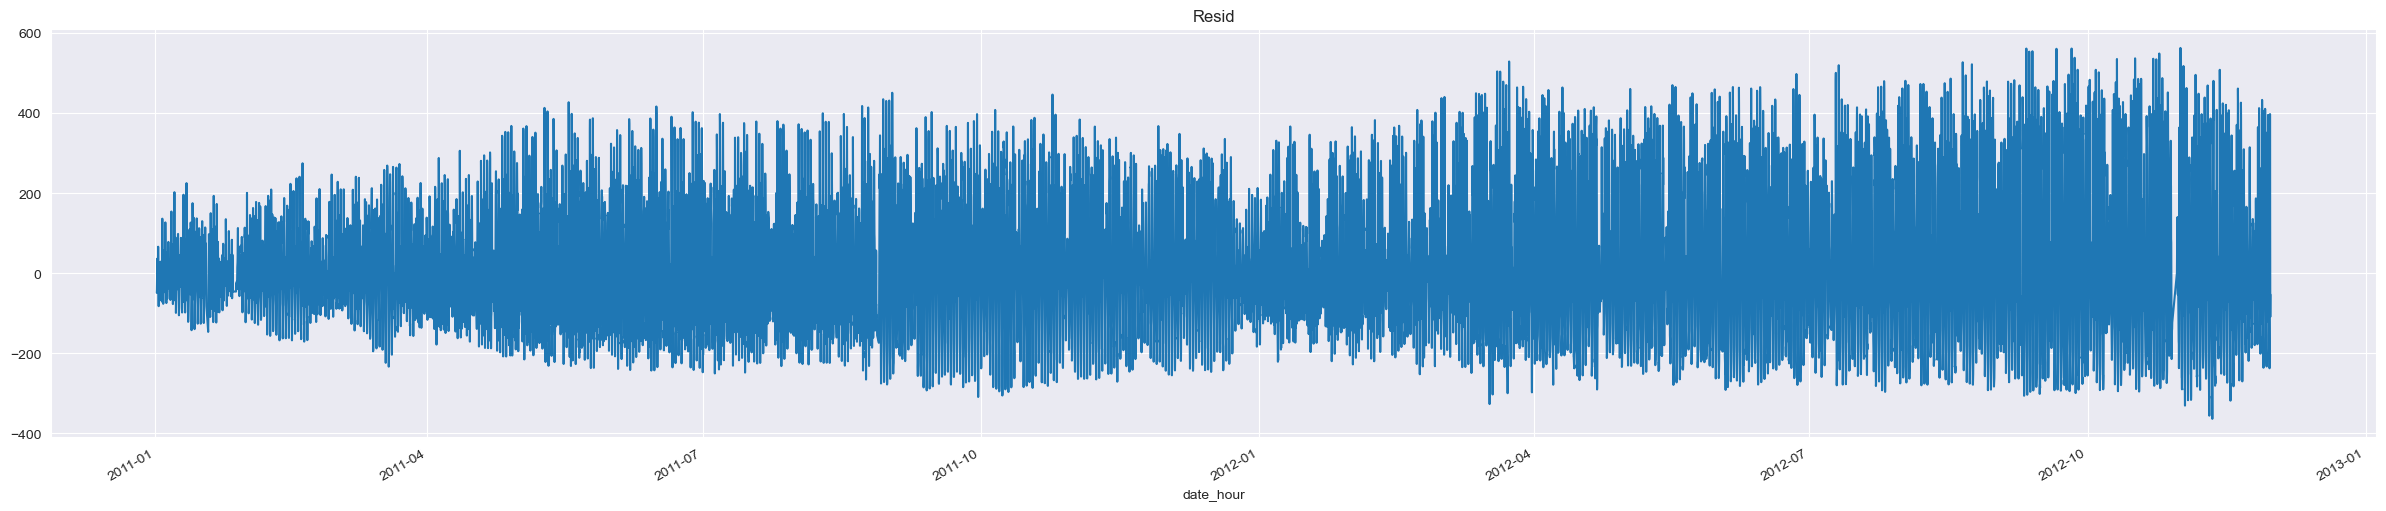

In [201]:
sd = seasonal_decompose(train['cnt'], model='additive', period=24)
plt.figure(figsize=(30,6))
plt.title("Trend")
sd.trend.plot()
plt.figure(figsize=(30,6))
plt.title("Seasonal")
sd.seasonal.plot()
plt.figure(figsize=(30,6))
plt.title("Resid")
sd.resid.plot()
plt.show()

In [202]:
# n = 24
# train[f'lag_{n}'] = train['cnt'].shift(n)
# train.dropna(inplace=True)
# display(train.head(10))

In [203]:
X_train = train.drop('cnt', axis=1)
y = train['cnt']


# Create fourier
# We saw that there is a Yearly and Daily pattern.
# There are other peaks very close to the Daily frequency, we'll test with different orders.
fourier = CalendarFourier(freq='YE', order = 1) # YE-Yearly
fourier2 = CalendarFourier(freq='D', order = 1) # D-Daily

dp = DeterministicProcess(index=X_train.index, constant=False, order=1, seasonal=False,
                          additional_terms = [fourier, fourier2], drop = True)
X_train2 = dp.in_sample()
test2 = dp.out_of_sample(steps = len(test),forecast_index=test.index)

X_train = pd.concat([X_train, X_train2], axis=1)
X_test = pd.concat([test, test2], axis=1)
display(X_train.head(), X_test.head())

,holiday,weathersit,temp,atemp,hum,windspeed,year,month,day_of_month,day_of_year,hour,weekday,trend,"sin(1,freq=YE-DEC)","cos(1,freq=YE-DEC)","sin(1,freq=D)","cos(1,freq=D)"
date_hour,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,0,1,0.24,0.2879,0.81,0.0,2011,1,1,1,0,5,1.0,0.000000,1.000000,0.000000,1.000000
2011-01-01 01:00:00,0,1,0.22,0.2727,0.80,0.0,2011,1,1,1,1,5,2.0,0.000717,1.000000,0.258819,0.965926
2011-01-01 02:00:00,0,1,0.22,0.2727,0.80,0.0,2011,1,1,1,2,5,3.0,0.001435,0.999999,0.500000,0.866025
2011-01-01 03:00:00,0,1,0.24,0.2879,0.75,0.0,2011,1,1,1,3,5,4.0,0.002152,0.999998,0.707107,0.707107
2011-01-01 04:00:00,0,1,0.24,0.2879,0.75,0.0,2011,1,1,1,4,5,5.0,0.002869,0.999996,0.866025,0.500000


,holiday,weathersit,temp,atemp,hum,windspeed,year,month,day_of_month,day_of_year,hour,weekday,trend,"sin(1,freq=YE-DEC)","cos(1,freq=YE-DEC)","sin(1,freq=D)","cos(1,freq=D)"
date_hour,,,,,,,,,,,,,,,,,
2012-12-01 00:00:00,0,1,0.26,0.3030,0.81,0.0000,2012,12,1,336,0,5,16638.0,-0.507415,0.861702,0.000000,1.000000
2012-12-01 01:00:00,0,1,0.26,0.3030,0.81,0.0000,2012,12,1,336,1,5,16639.0,-0.506799,0.862064,0.258819,0.965926
2012-12-01 02:00:00,0,2,0.26,0.3030,0.81,0.0000,2012,12,1,336,2,5,16640.0,-0.506182,0.862427,0.500000,0.866025
2012-12-01 03:00:00,0,2,0.26,0.2727,0.81,0.1343,2012,12,1,336,3,5,16641.0,-0.505565,0.862789,0.707107,0.707107
2012-12-01 04:00:00,0,1,0.26,0.2879,0.81,0.0896,2012,12,1,336,4,5,16642.0,-0.504948,0.863150,0.866025,0.500000


## Modeling

### Ensembles

Ensemble learning is een techniek binnen machine learning waarbij de voorspellingen van meerdere modellen worden gecombineerd om tot een betere prestatie te komen dan een enkel model zou kunnen bereiken. Het idee is om de kracht van verschillende modellen te bundelen door hun resultaten samen te voegen. Elk model heeft zijn eigen sterke en zwakke punten, en door ze te combineren, hopen we de nauwkeurigheid, robuustheid en generalisatie van onze voorspellingen te verbeteren.

Er zijn verschillende methoden om ensemble leren toe te passen:

Bagging (Bootstrap Aggregating): Dit houdt in dat we meerdere versies van een model trainen op verschillende subsets van de trainingsdata. Deze subsets worden willekeurig geselecteerd met teruglegging, zodat sommige voorbeelden vaker voorkomen en andere juist helemaal niet. Elk model wordt onafhankelijk getraind, en de uiteindelijke voorspelling komt tot stand door bijvoorbeeld meerderheidsstemmen (bij classificatie) of het gemiddelde van de voorspellingen (bij regressie). Een bekend voorbeeld van een bagging-algoritme is Random Forest.

Boosting: Bij boosting worden modellen na elkaar getraind. Elk nieuw model probeert de fouten van het vorige model te corrigeren door meer nadruk te leggen op de voorbeelden die eerder verkeerd geclassificeerd werden. Algoritmen zoals AdaBoost, Gradient Boosting en XGBoost maken gebruik van deze aanpak.

Stacking: Stacking is een methode waarbij we meerdere basismodellen gebruiken en hun voorspellingen combineren met behulp van een meta-model. Dit meta-model wordt getraind om de output van de basismodellen zo goed mogelijk samen te voegen om tot een betere uiteindelijke voorspelling te komen.

Door deze technieken toe te passen in ons project, kunnen we het risico op overfitting verminderen en de nauwkeurigheid van ons model verhogen. Ensemble-methoden zijn dan ook populair in de praktijk en worden veel gebruikt bij machine learning-competities, omdat ze vaak betere resultaten opleveren dan individuele modellen.  
[(GeeksforGeeks, 2023h)](https://www.geeksforgeeks.org/a-comprehensive-guide-to-ensemble-learning/)

#### Gradient Boost

Gradient Boosting is een machine learning-techniek die stap voor stap beter wordt. Het begint met een simpel model dat een gemiddelde voorspelt. Daarna berekent het de fouten (de residuen) en gebruikt die om een nieuw model te trainen. Dit proces herhaalt zich totdat de fouten heel klein zijn. Het gebruikt een wiskundige techniek, genaamd gradient descent, om deze fouten steeds kleiner te maken. Hierdoor kan het sterke voorspellingen doen, maar het kan wel traag zijn bij grote datasets.  
[(GeeksforGeeks, 2023b)](https://www.geeksforgeeks.org/boosting-in-machine-learning-boosting-and-adaboost/)

In [ ]:
gb_model = GradientBoostingRegressor(loss='squared_error', learning_rate=0.01, n_estimators=200, criterion='friedman_mse', max_depth=10)
gb_model.fit(X_train, y_train)

gb_score = cross_val_score(gb_model, X_train, y_train, scoring='neg_root_mean_squared_error', cv=10, n_jobs=-1, verbose=1).mean()
print(f"GB score: {gb_score}")

In [ ]:
gb_params = {
    'loss':{'squared_error', 'absolute_error', 'huber', 'quantile'},
    'learning_rate':{0.001, 0.01, 0.1},
    'n_estimators':{50, 100, 250, 500},
    'criterion':{'friedman_mse','squared_error'},
    'min_sample_split':{2,3,4,5},
    'min_sample_leaf':{1,2,3,4,5},
    'max_depth':{3,5,10},
    'max_features':{None,'sqrt','log2'},
    'warm_start':{False, True}
}

gb_model = GradientBoostingRegressor()
gridsearch = GridSearchCV(gb_model, gb_params, cv=5, scoring='neg_root_mean_squared_error', verbose=1, n_jobs=-1)
gridsearch.fit(X_train, y_train)

print(f"Best Parameters: {gridsearch.best_params_}")

gb_tuned = gridsearch.best_estimator_

gb_score = cross_val_score(gb_tuned, X_train, y_train, scoring='neg_root_mean_squared_error', cv=10, n_jobs=-1, verbose=1).mean()
print(f"GB score: {gb_score}")

#### XGBoost

XGBoost is een verbeterde versie van Gradient Boosting. Het is sneller en nauwkeuriger, omdat het een techniek gebruikt die *regularisatie* heet. Dit voorkomt dat het model te ingewikkeld wordt (overfitting). XGBoost gebruikt ook slimme technieken, zoals parallel werken en efficiënt omgaan met grote hoeveelheden data. Hierdoor is het heel populair, vooral bij grote projecten.  
[(GeeksforGeeks, 2023b)](https://www.geeksforgeeks.org/boosting-in-machine-learning-boosting-and-adaboost/)

In [ ]:
xgb_model = XGBRegressor(tree_method='hist')  # Specify a fast training method
xgb_model.fit(X_train, y_train)

xgb_score = cross_val_score(xgb_model, X_train, y_train, scoring='neg_root_mean_squared_error', cv=10, n_jobs=-1, verbose=1).mean()
print("XGBoost CV Score:", xgb_score)

In [ ]:
xgb_params = {
    'objective': ['reg:squarederror', 'reg:absoluteerror'],
    'learning_rate': [0.001, 0.01, 0.1],
    'n_estimators': [50, 100, 250, 500],
    'max_depth': [3, 5, 10],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1, 5],
}

xgb_model = XGBRegressor(tree_method='hist') 
xgb_gridsearch = GridSearchCV(xgb_model, xgb_params, cv=5, scoring='neg_root_mean_squared_error', verbose=1, n_jobs=-1)
xgb_gridsearch.fit(X_train, y_train)

print("Best Parameters for XGBoost:", xgb_gridsearch.best_params_)

xgb_tuned = xgb_gridsearch.best_estimator_
xgb_score = cross_val_score(xgb_tuned, X_train, y_train, scoring='neg_root_mean_squared_error', cv=10, n_jobs=-1, verbose=1).mean()
print("XGBoost CV Score:", xgb_score)

#### AdaBoost

AdaBoost werkt ook stap voor stap, maar richt zich vooral op de moeilijkste fouten. Een belangrijk onderdeel van AdaBoost is de alpha-parameter. Deze parameter bepaalt hoeveel invloed elk zwak model heeft op het eindresultaat. Als een zwak model weinig fouten maakt, krijgt het een hogere alpha-waarde en heeft het meer gewicht in het totale model. Als een model veel fouten maakt, krijgt het een lagere alpha-waarde en minder invloed. Hierdoor focust AdaBoost zich op de moeilijkere delen van de data en probeert deze beter te voorspellen. Dit is handig voor simpele problemen, maar minder geschikt als er veel ruis in de data zit.  
[(GeeksforGeeks, 2023b)](https://www.geeksforgeeks.org/boosting-in-machine-learning-boosting-and-adaboost/)

In [ ]:
ada_model = AdaBoostRegressor()
ada_model.fit(X_train, y_train)

ada_score = cross_val_score(ada_model, X_train, y_train, scoring='neg_root_mean_squared_error', cv=10, n_jobs=-1, verbose=1).mean()
print("AdaBoost CV Score:", ada_score)

In [ ]:
ada_params = {
    'n_estimators': [50, 100, 250, 500],
    'learning_rate': [0.001, 0.01, 0.1, 1],
    'loss': ['linear', 'square', 'exponential']
}

ada_model = AdaBoostRegressor()
ada_gridsearch = GridSearchCV(ada_model, ada_params, cv=5, scoring='neg_root_mean_squared_error', verbose=1, n_jobs=-1)
ada_gridsearch.fit(X_train, y_train)

print("Best Parameters for AdaBoost:", ada_gridsearch.best_params_)

ada_tuned = ada_gridsearch.best_estimator_
ada_score = cross_val_score(ada_tuned, X_train, y_train, scoring='neg_root_mean_squared_error', cv=10, n_jobs=-1, verbose=1).mean()
print("AdaBoost CV Score:", ada_score)

#### Stacking

Stacking is een techniek in machine learning waarbij we meerdere modellen combineren om betere voorspellingen te maken. Het bestaat uit twee lagen:
- Eerste laag: Hier gebruiken we verschillende "basis-modellen" (bijvoorbeeld een beslissingboom, een lineaire regressie, of een random forest). Deze modellen maken elk een voorspelling op basis van dezelfde data.
- Tweede laag: De voorspellingen van de modellen uit de eerste laag worden doorgegeven aan een nieuw model, de "meta-classifier" of "meta-regressor". Dit model leert van de combinaties van voorspellingen van de eerste laag en maakt zo een nieuwe, verbeterde voorspelling.

![Stacking Architecture](https://media.geeksforgeeks.org/wp-content/uploads/20200713234827/mlxtend.PNG)  
[(GeeksforGeeks, 2021)](https://www.geeksforgeeks.org/stacking-in-machine-learning-2/)

In [ ]:
base_models = [
    ('xgb', XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5)),
    ('gbr', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)),
    ('ada', AdaBoostRegressor(n_estimators=100, learning_rate=0.1)),
]

# Define meta-model
meta_model = LinearRegression(alpha=1.0)

# Define Stacking Regressor
stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model, cv=5, n_jobs=-1)

# Fit Stacking Model
stacking_model.fit(X_train, y_train)

# Evaluate with cross-validation
stacking_score = cross_val_score(stacking_model, X_train, y_train, scoring='neg_root_mean_squared_error', cv=10, n_jobs=-1, verbose=1).mean()
print("Stacking Model CV Score:", stacking_score)

## Results

## Conclusion & Advice

## Sources